### Import libraries and read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import onehot_encode_array

import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
GB1_test_data = pd.read_csv('GB1_test_data.csv',index_col=[0])
y_test = GB1_test_data['y_test'].values

In [3]:
GB1_test_data.head()

,x_test,y_test
0,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDPSWTYDD...,-5.462769
1,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYAVDNGVAGEWTYDD...,-4.501484
2,QYKLILNGPTLKGETTTEAVDAATAEKVFKQYANDNGVGGEWTYDD...,-1.259925
3,QYKLILNGKTLKGETTTEAVDAATAEKPFHQYANDNGVDGEWTYDD...,-5.058220
4,QYKLIGNGKTLKGEETTEAVDAATAEKVFKQYANDNGVDGEWTYDD...,-2.361848


In [4]:
characters =  ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [5]:
x_test_OHE = onehot_encode_array(GB1_test_data['x_test'].values,bases_dict=characters,ohe_single_batch_size=100000)

In [6]:
model = tf.keras.models.load_model('GB1_linear_model.h5')

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Sequence (InputLayer)        (None, 1100)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1101      
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_prediction = model.predict(x_test_OHE)

In [9]:
from mavenn.src.utils import fix_gauge_additive_model

In [10]:
sequenceLength = len(GB1_test_data['x_test'].values[0])
alphabetSize = len(characters)

# Non-gauge fixed theta
theta_all = model.layers[1].get_weights()[0]    # E.g., could be theta_additive + theta_pairwise
theta_nought = model.layers[1].get_weights()[1]
theta = np.hstack((theta_nought, theta_all.ravel()))

In [11]:
theta_gf = fix_gauge_additive_model(sequenceLength,alphabetSize,theta)

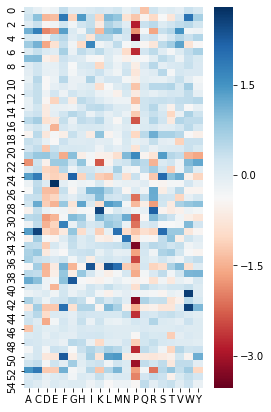

In [12]:
import seaborn as sns
plt.figure(figsize=(4,7))
sns.heatmap(theta_gf[1:].reshape(55,20),xticklabels=characters,cmap='RdBu')

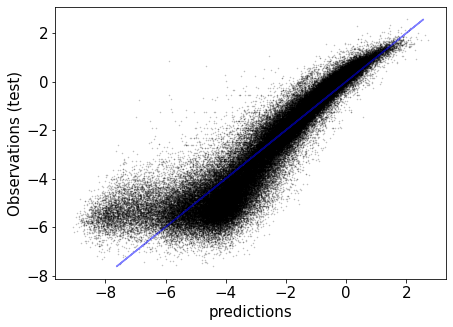

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(model_prediction,y_test,s=0.25,color='black',alpha=0.25)
plt.xlabel('predictions',fontsize=15)
#plt.title('Observed vs. predictions (test)',fontsize=15)
plt.ylabel('Observations (test)',fontsize=15)
plt.plot(y_test,y_test,color='blue',alpha=0.5)
plt.tick_params(labelsize=15)
plt.show()